In [25]:
import matplotlib.pyplot as plt
import os
import numpy as np 
import pickle

In [30]:
data = []
for filename in os.listdir('results'):
    with open('results/' + filename, 'rb') as f:
        data.append(pickle.load(f))

data = np.array(data)
print(data.shape)

(229, 99)


In [32]:
data = np.mean(data, axis=0)

In [57]:
data.shape

(99,)

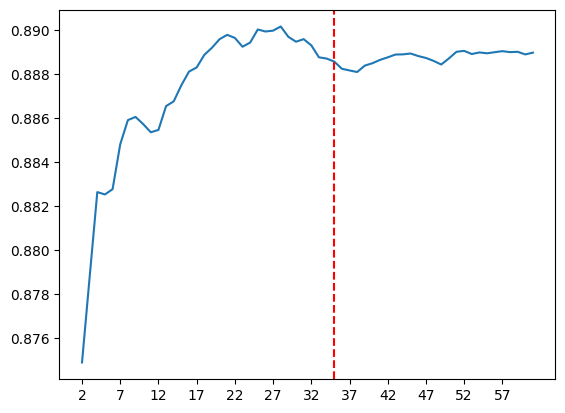

In [70]:
plot = plt.plot(data[:60])

# First data point is x = 2, 3, ..., 100
plt.xticks(np.arange(0, 60, 5), np.arange(2, 62, 5))

# Draw red vertical line at x = 35
plt.axvline(x=33, color='r', linestyle='--')

In [26]:
data = {}

# Get all files in results/run_i/*.pkl
for i in range(1, 11):
    data[f'run_{i}'] = []
    for file in os.listdir(f'results_10_runs/run_{i}'):
        if file.endswith('.pkl'):
            with open(f'results_10_runs/run_{i}/{file}', 'rb') as f:
                data[f'run_{i}'].append(pickle.load(f))

In [27]:
avg_for_each_run = []

for run in data.values():
    avg_for_each_run.append(np.mean(run, axis=0))

average = np.mean(avg_for_each_run, axis=0)
average.shape

(99,)

In [28]:
average

array([0.88509228, 0.88326043, 0.88409649, 0.88520024, 0.88549055,
       0.88592868, 0.88592869, 0.88558433, 0.8855469 , 0.88491696,
       0.88484384, 0.88433813, 0.88436947, 0.88420483, 0.88419402,
       0.88419408, 0.88420532, 0.88412266, 0.884322  , 0.88441019,
       0.8844061 , 0.8843631 , 0.8842964 , 0.88388219, 0.88401119,
       0.8838451 , 0.88368673, 0.88362519, 0.88369749, 0.88368955,
       0.88371638, 0.88371199, 0.88362535, 0.88362628, 0.88371196,
       0.88371161, 0.88382916, 0.88377163, 0.88383344, 0.88374987,
       0.88373084, 0.88383629, 0.88394415, 0.88398068, 0.88401439,
       0.8841105 , 0.88416432, 0.88429093, 0.88420617, 0.88405049,
       0.88407247, 0.88408679, 0.88413584, 0.88425038, 0.8842452 ,
       0.88423292, 0.88426963, 0.88429259, 0.88421731, 0.88422633,
       0.8842241 , 0.88417088, 0.8841815 , 0.88423068, 0.88433955,
       0.8842234 , 0.88424409, 0.88428011, 0.88425969, 0.8842577 ,
       0.88410952, 0.8841253 , 0.88409244, 0.88406736, 0.88404

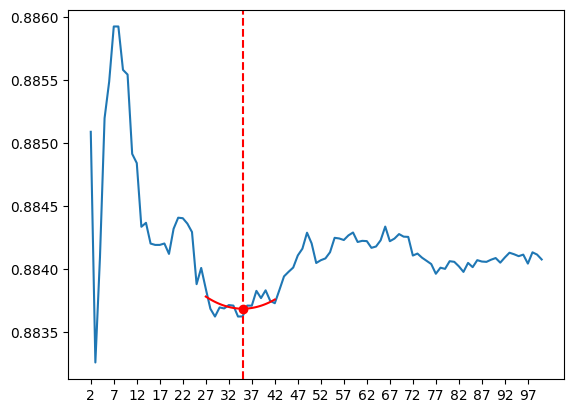

In [96]:
# Plot average scores over time
plt.plot(average)

# First data point is x = 2, 3, ..., 100
plt.xticks(np.arange(0, 100, 5), np.arange(2, 102, 5))

coefficients = np.polyfit(np.arange(27, 43, 1), average[25:41], 2)
polynomial = np.poly1d(coefficients)
x_poly = np.linspace(25, 40, 100)
y_poly = polynomial(x_poly)
polynomial_derivative = np.polyder(polynomial)
y_derivative = polynomial_derivative(x_poly)
plt.plot(x_poly, y_poly, color='red', label='Polynomial Fit')

# Find the lowest point of the polynomial
min_index = np.argmin(y_poly)
min_x = x_poly[min_index]
min_y = y_poly[min_index]
plt.plot(min_x, min_y, 'ro')


# Draw red vertical line at x = 35
plt.axvline(x=33, color='r', linestyle='--')

# Plot slope from x=10 to x=35
# plt.plot([8, 33], [average[8], average[33]], 'r')
# plt.plot([33, 98], [average[33], average[98]], 'r')

In [97]:
min_x

33.03030303030303

In [99]:
min_y

0.8836875352478066